# Step 1 - Import the required Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 2 - Reading data form csv file

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# here we can get the shape of the dataset
df.shape

(25, 2)

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
# check if there is any null value or not
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<Figure size 1440x1440 with 0 Axes>

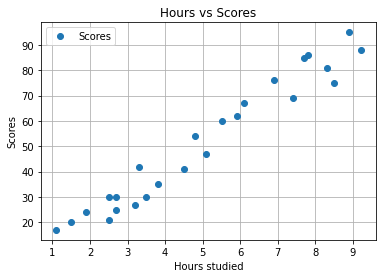

In [10]:
# Plot the scatterplot to get the idea of the relationship
fig = plt.figure(figsize = (20,20))
df.plot(x= 'Hours', y= 'Scores', style = 'o')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores')
plt.grid(True)

#### from the above fig,we can clearly observe the relationship between 'hours studied' and 'scores'.so we can apply linear regression in our model to predict the further values

# Step 3 - Preparing the data to apply required ML model

#### we will divide the data into input and output  and split the data into training and testing set 

In [11]:
X = df.iloc[:,:-1].values

In [12]:
y = df.iloc[:,1].values

In [13]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#### As we have our data so now we will split this data into training and testing sets. For doing this we will  use scikit learn librarys built in train_test_split() method.

In [15]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

# Step 4 - Traning the model

In [16]:
lr=LinearRegression()
lr.fit(X_train,y_train)

print("Training completed sucessfully")

Training completed sucessfully


In [17]:
lr.predict(X_test)

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [18]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [19]:
print(f'coefficient:{lr.coef_}')
print(f'intercept:{lr.intercept_}')

coefficient:[9.91065648]
intercept:2.018160041434683


#### plotting the Regression line using y = m*x+c

In [20]:
line = lr.coef_*X+lr.intercept_

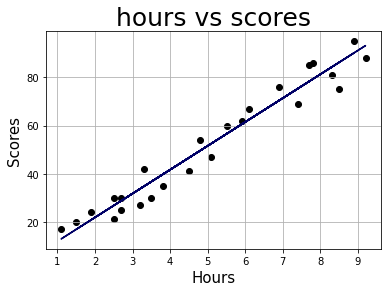

In [21]:
plt.scatter(X,y,color='#000000')
plt.plot(X,line,color='#000066')
plt.title('hours vs scores', fontsize=25)
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.grid(True)

# Step 5 - Lets Predict some values

In [22]:
y_pred= lr.predict(X_test)

In [23]:
print(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [24]:
data1 = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
data1

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [25]:
# Check the output by putting random values
n = float(input("enter no. of hours studying per day: "))
pre = lr.predict([[n]])
print(f"if the no. of hours are {n},then Predicted score is {pre[0]}")

enter no. of hours studying per day: 7
if the no. of hours are 7.0,then Predicted score is 71.39275540593034


In [29]:
n = float(input("enter no. of hours studying per day: "))
pre1 = lr.predict([[n]])
print(f"if the no. of hours are {n},then Predicted score is {pre1[0]}")

enter no. of hours studying per day: 9.25
if the no. of hours are 9.25,then Predicted score is 93.69173248737538


# Step 6 : Evaluating the model

#### The final step is to evaluate the perforamance of an algorithm

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared=False)

4.6474476121003665

# Step 7: Solution

#### What will be predicted score if a student studies 9.25 hrs/day?

In [31]:
print(f"If a student studies 9.25 hrs/day, \n then the predicted score would be {pre1[0]} approximately ")

If a student studies 9.25 hrs/day, 
 then the predicted score would be 93.69173248737538 approximately 
